In [1]:
# read dataset
data <- read.csv('/Users/alessia/Desktop/economic_freedom/freedom_index.csv')
data

X,Country,Region,Year,Overall.Score,Property.Rights,Government.Integrity,Judicial.Effectiveness,Tax.Burden,Government.Spending,Fiscal.Health,Business.Freedom,Labor.Freedom,Monetary.Freedom,Trade.Freedom,Investment.Freedom,Financial.Freedom
<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,Singapore,Asia-Pacific,2024,83.5,94.2,88.3,58.3,90.7,89.2,76.0,86.9,77.3,76.3,95.0,90,80
1,Switzerland,Europe,2024,83.0,94.2,91.3,98.1,70.4,64.6,95.7,89.3,60.7,80.8,86.4,85,80
2,Ireland,Europe,2024,82.6,93.5,83.4,94.3,78.0,82.4,91.7,91.3,62.8,74.5,79.2,90,70
3,Taiwan,Asia-Pacific,2024,80.0,82.2,73.4,94.0,79.2,90.5,90.3,84.9,69.1,80.1,86.4,70,60
4,Luxembourg,Europe,2024,79.2,96.9,84.9,95.8,64.6,40.6,97.6,89.5,57.7,69.1,79.2,95,80
5,Denmark,Europe,2024,77.8,98.6,97.4,89.6,41.8,26.8,98.2,92.7,64.9,74.3,79.2,90,80
6,Estonia,Europe,2024,77.8,92.8,81.2,93.4,80.8,46.8,85.4,83.2,64.2,66.2,79.2,90,70
7,New Zealand,Asia-Pacific,2024,77.8,87.4,95.9,93.2,65.5,46.3,72.4,88.3,70.3,74.6,89.8,70,80
8,Norway,Europe,2024,77.5,98.8,95.6,96.7,61.7,32.1,97.2,87.2,69.4,71.1,84.8,75,60


In [2]:
# view table summary
summary(data)

       X            Country             Region               Year     
 Min.   :  0.00   Length:176         Length:176         Min.   :2024  
 1st Qu.: 43.75   Class :character   Class :character   1st Qu.:2024  
 Median : 87.50   Mode  :character   Mode  :character   Median :2024  
 Mean   : 87.50                                         Mean   :2024  
 3rd Qu.:131.25                                         3rd Qu.:2024  
 Max.   :175.00                                         Max.   :2024  
 Overall.Score   Property.Rights  Government.Integrity Judicial.Effectiveness
 Min.   : 2.90   Min.   :  0.00   Min.   : 3.60        Min.   : 3.30         
 1st Qu.:51.98   1st Qu.: 37.27   1st Qu.:28.10        1st Qu.:28.80         
 Median :58.80   Median : 49.50   Median :40.90        Median :45.80         
 Mean   :58.64   Mean   : 54.59   Mean   :44.43        Mean   :49.80         
 3rd Qu.:65.75   3rd Qu.: 72.55   3rd Qu.:58.48        3rd Qu.:71.88         
 Max.   :83.50   Max.   :100.00   M

In [3]:
# check for missing values
sum(is.na(data))

[1] 0

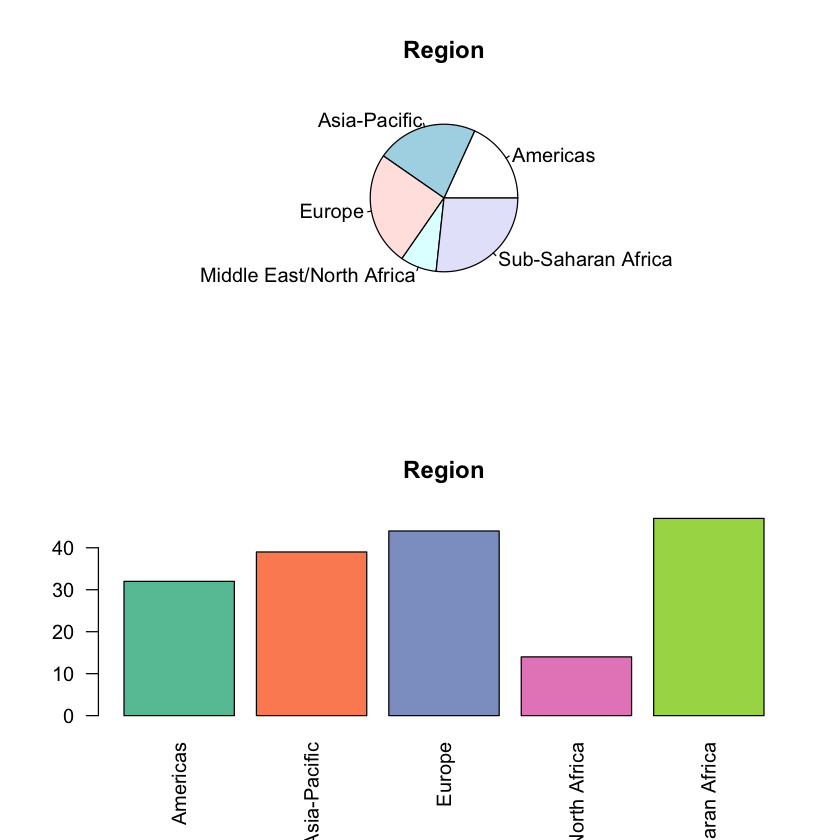

In [4]:
# visualize piechart and barplot of variable Region
library(RColorBrewer)
par(mfrow = c(2, 1))
pie(table(data$Region), main = 'Region')
barplot(table(data$Region), main = 'Region', las = 2, col = brewer.pal(8, 'Set2'))

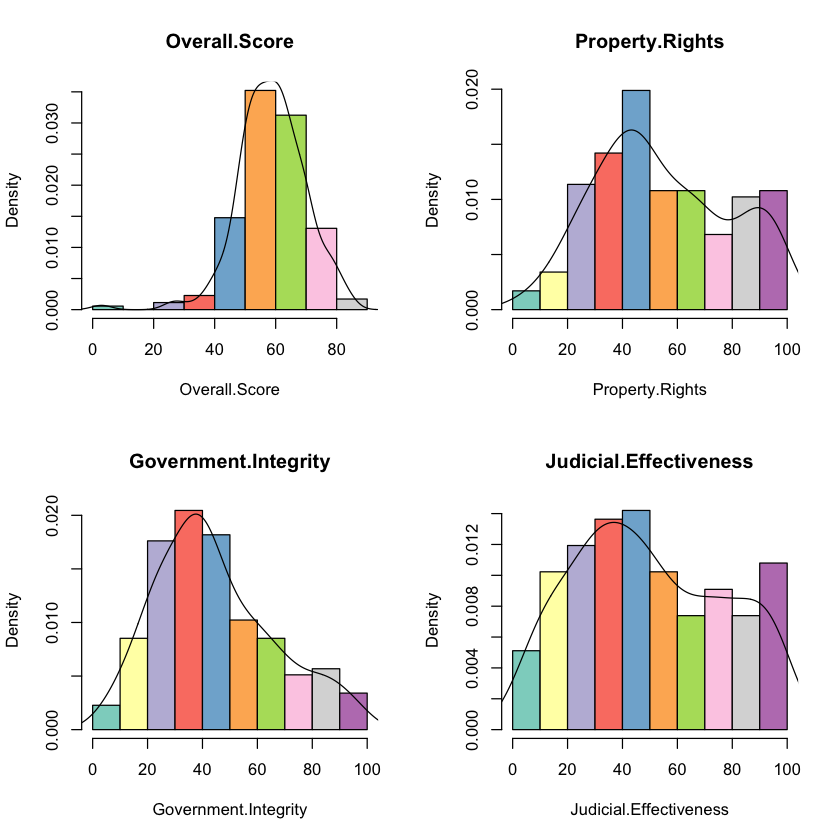

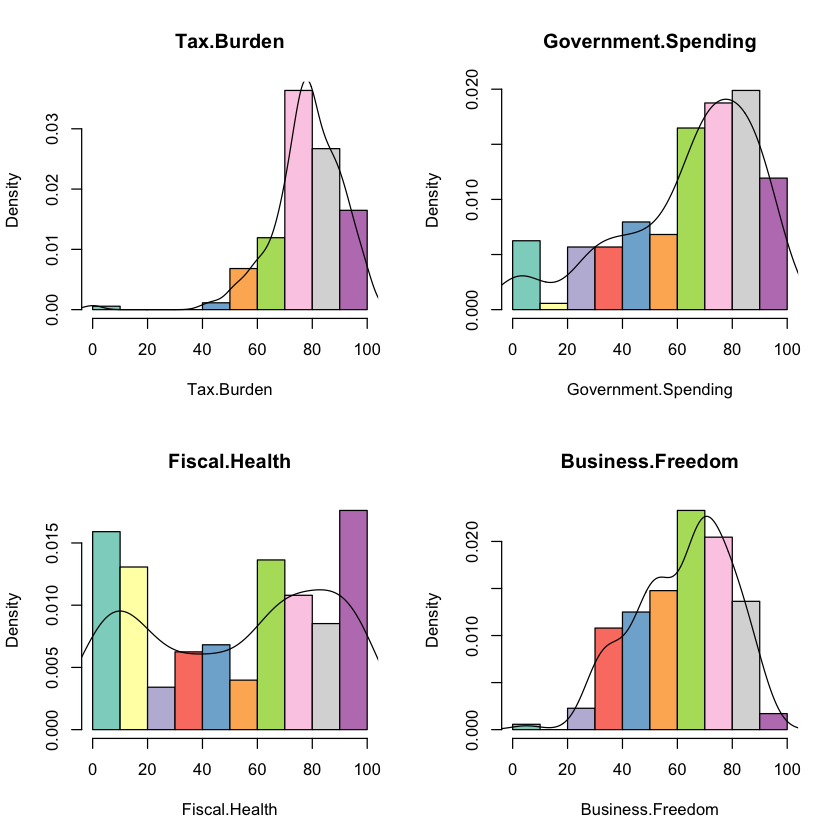

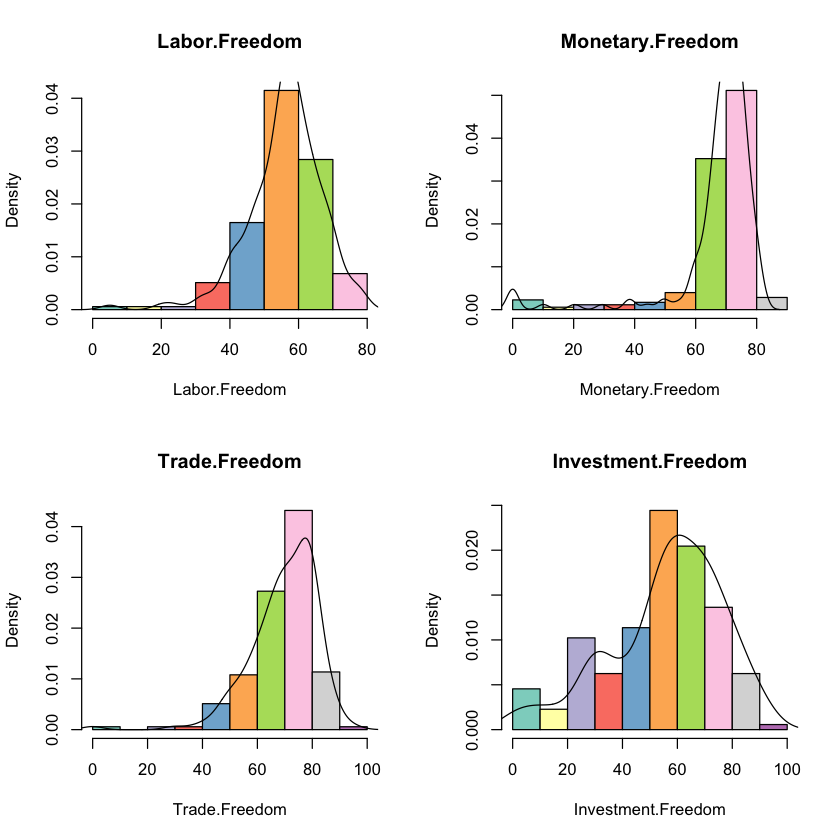

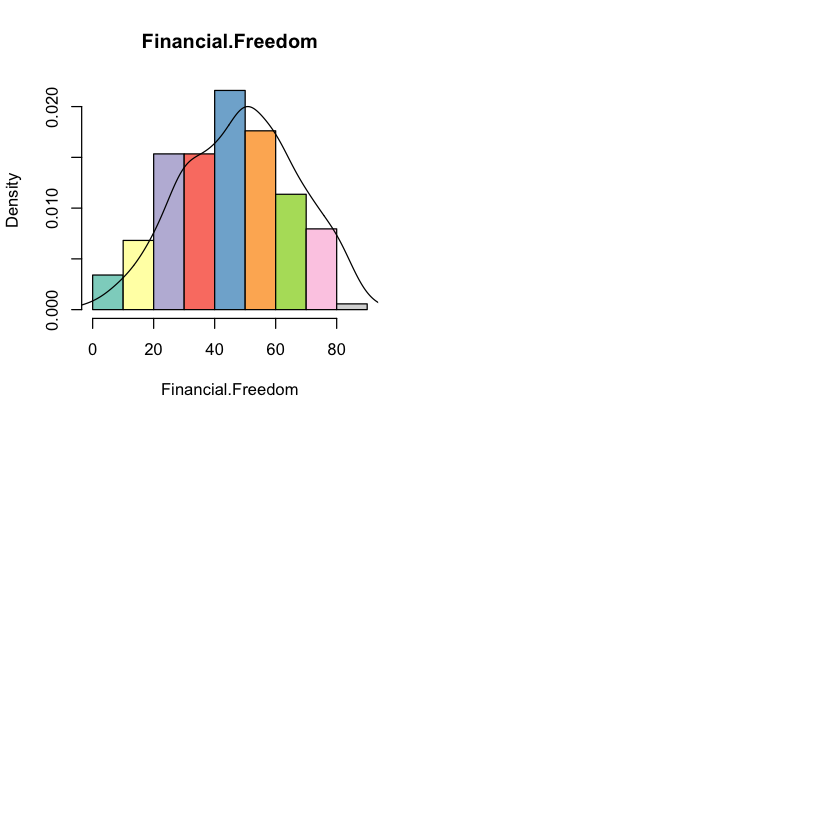

In [16]:
# histograms of continuous variables
par(mfrow = c(2, 2))
for (var in colnames(data)[5:17]){
    dens <- density(data[[var]])
    hist(data[[var]], main = var, freq = F, xlab = var, col = brewer.pal(12, "Set3"))
    lines(dens)
}

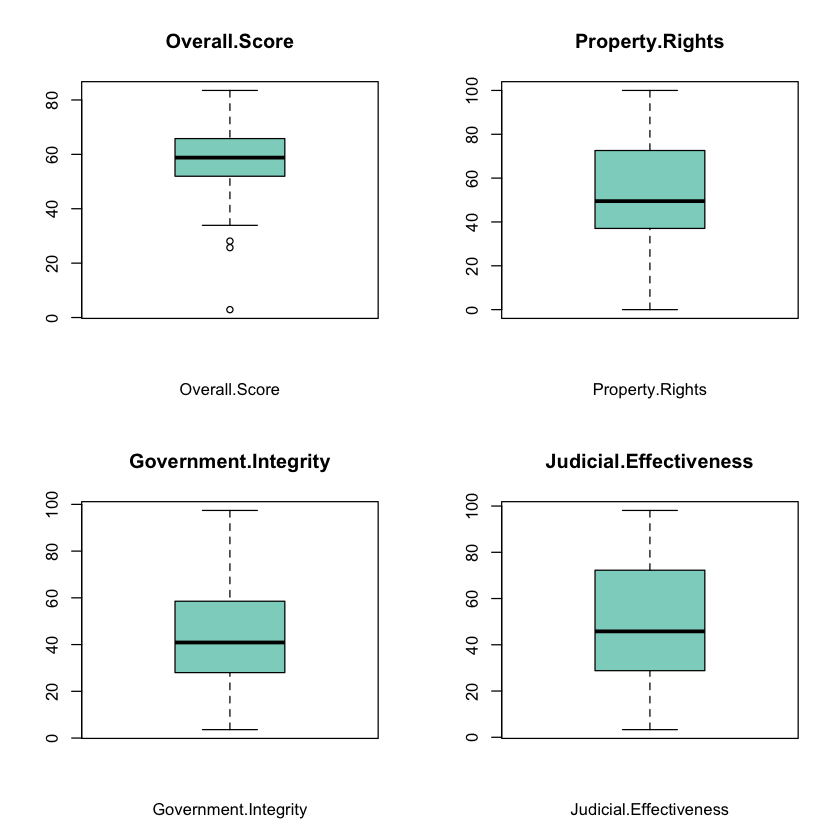

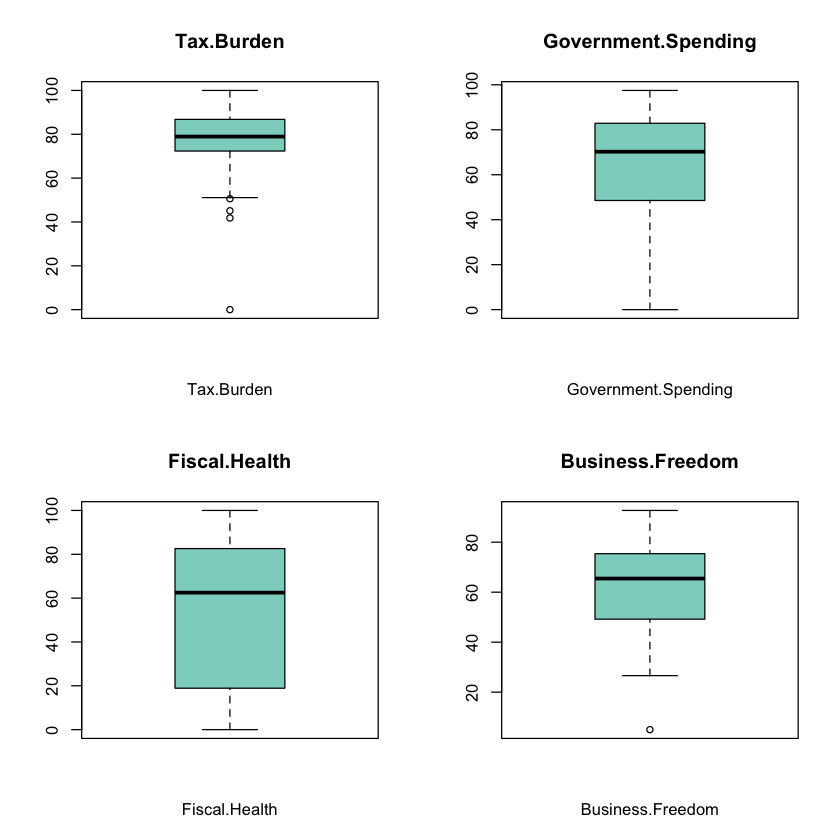

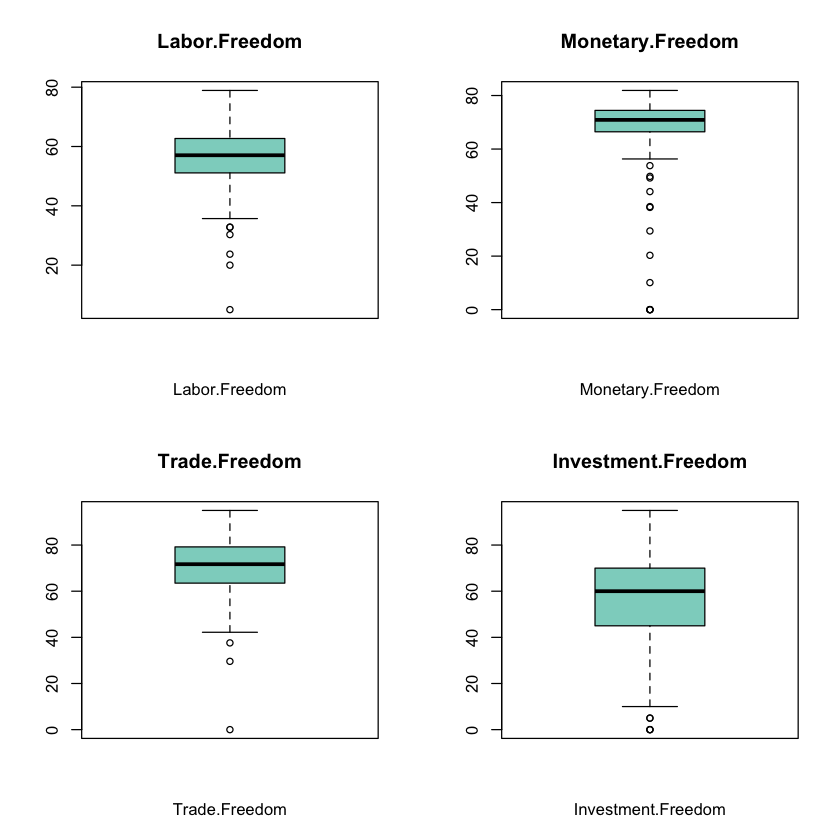

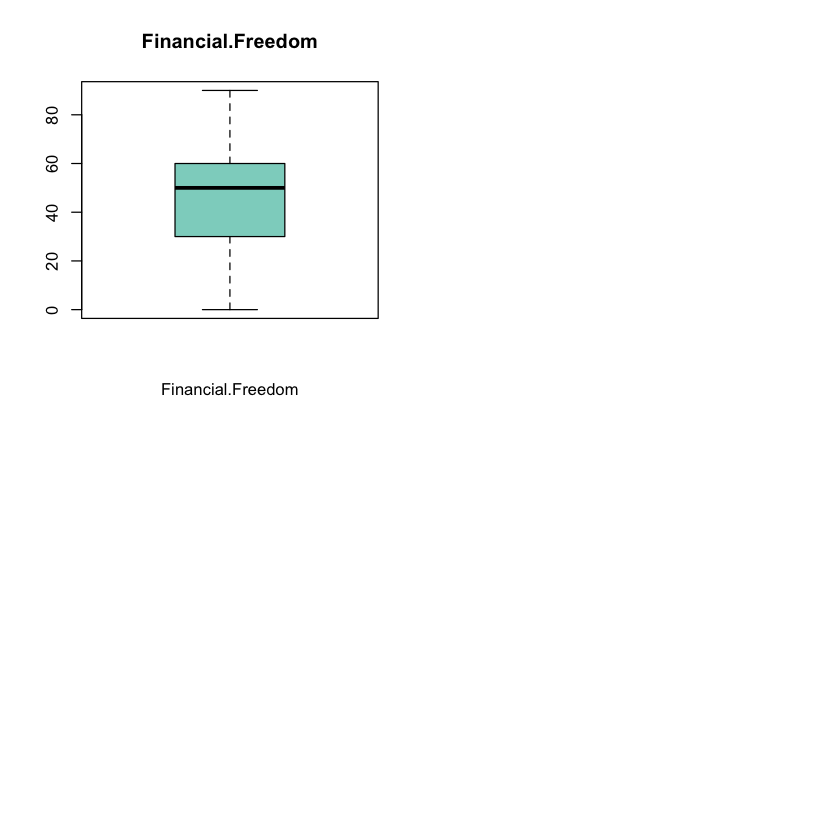

In [6]:
# boxplots of continuous variables
par(mfrow = c(2, 2))
for (var in colnames(data)[5:17]){
    boxplot(data[[var]], main = var, xlab = var, col = brewer.pal(12, "Set3"))
}

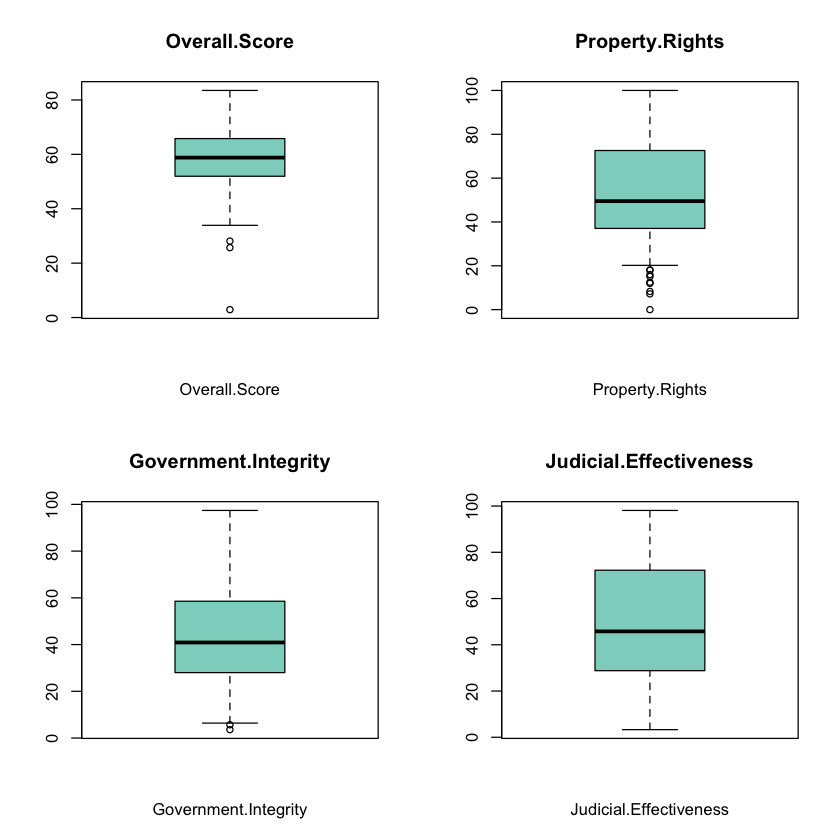

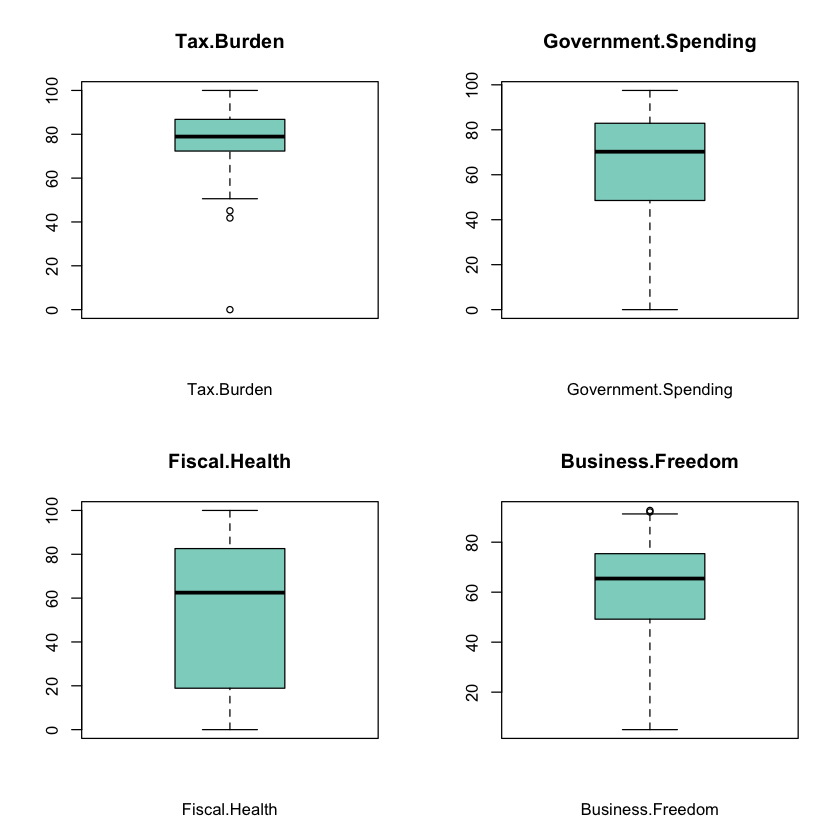

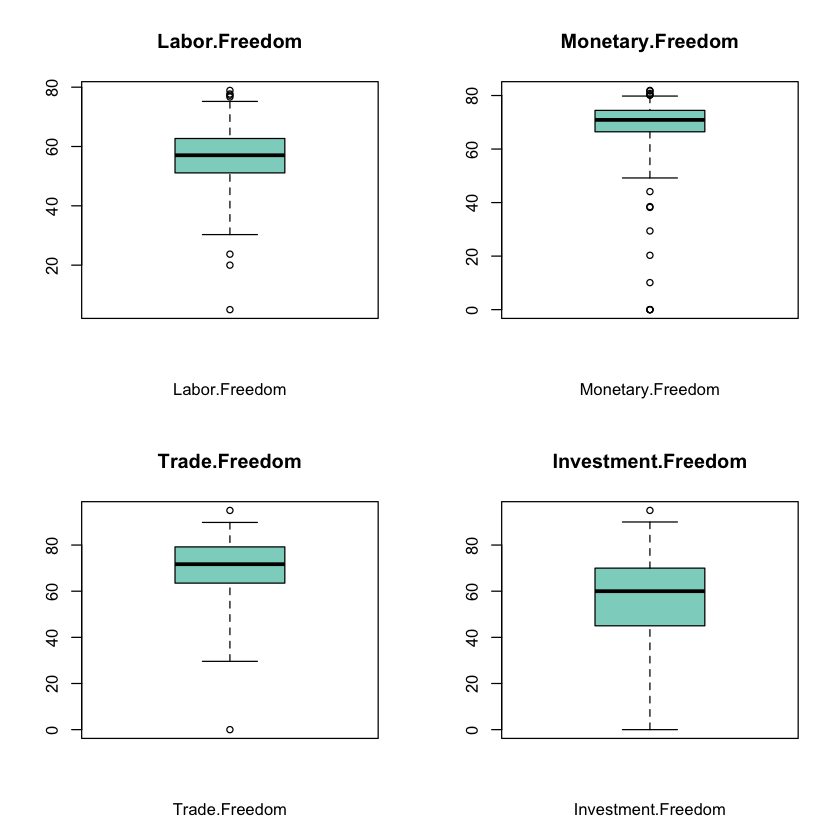

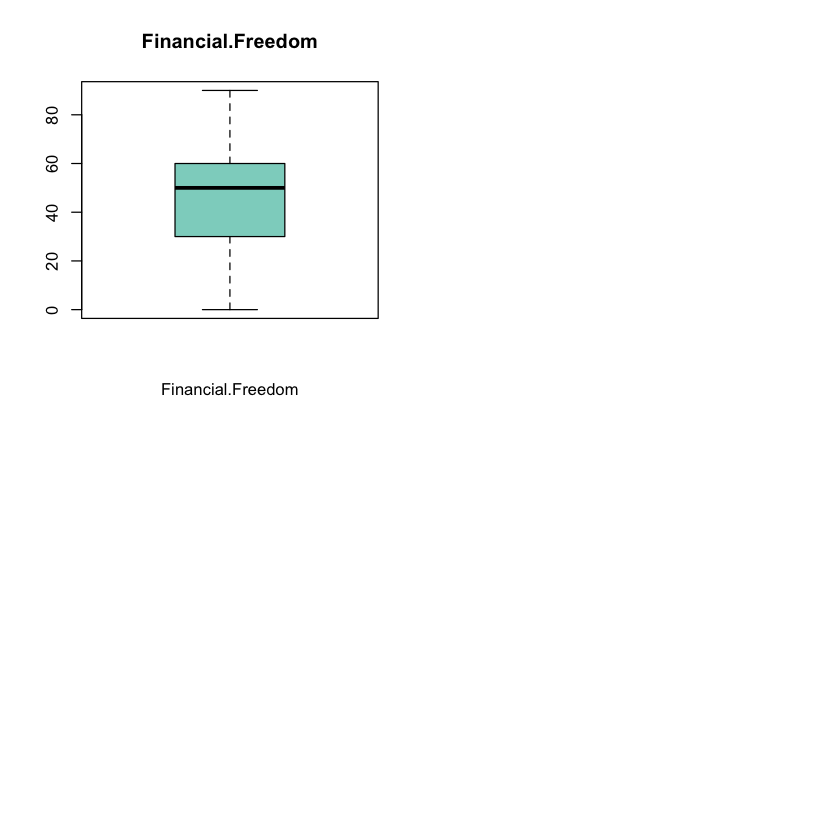

In [7]:
# robust boxplots of continuous variables
options(mc_doScale_quiet=TRUE)
par(mfrow = c(2, 2))
library(robustbase)
for (var in colnames(data)[5:17]){
    adjbox(data[[var]], main = var, xlab = var, col = brewer.pal(12, "Set3"))
}

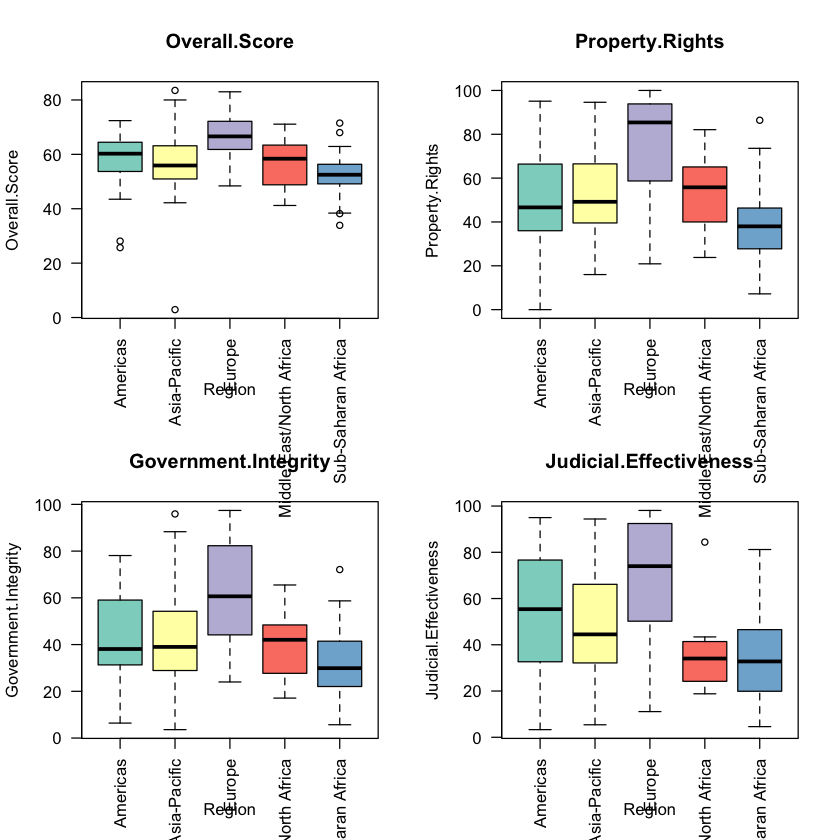

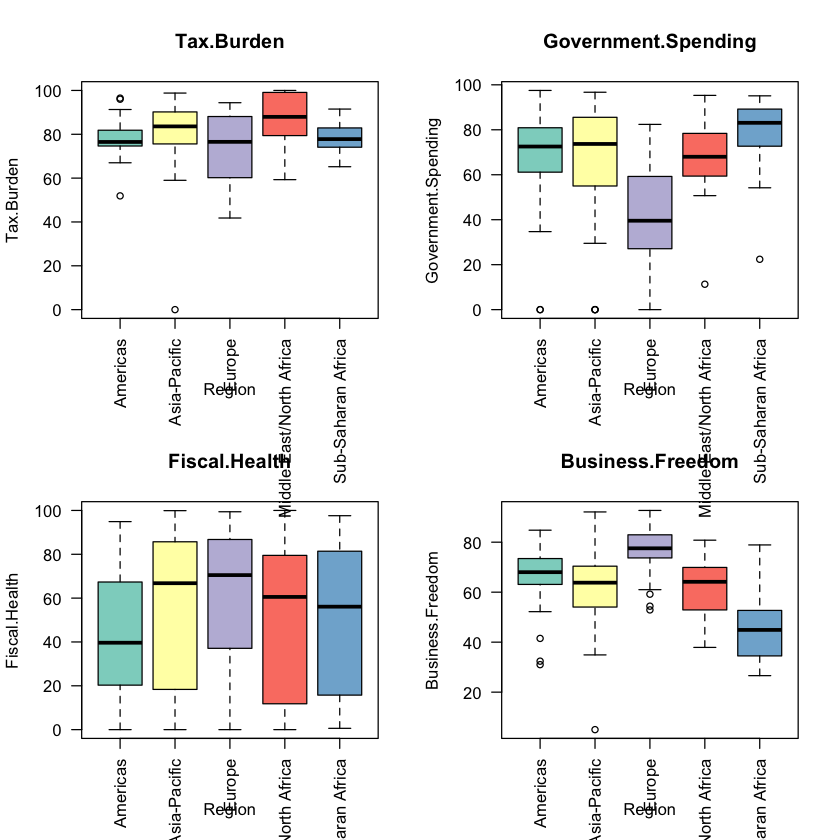

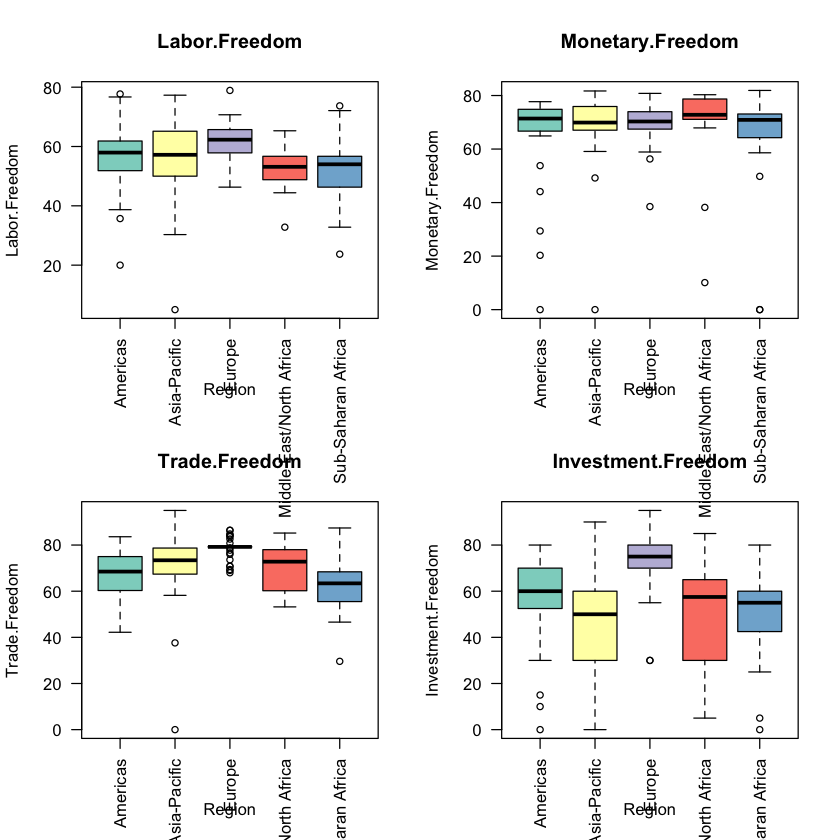

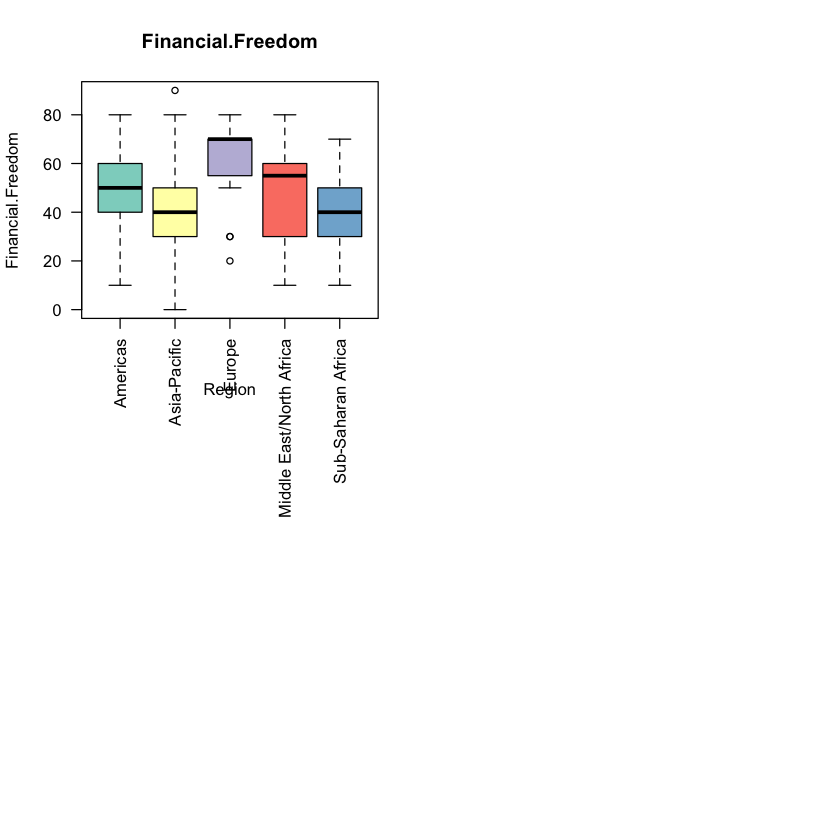

In [8]:
# continuous variables according to different levels of the categorical variable Region
par(mfrow = c(2, 2))
for (var in colnames(data)[5:17]){
    boxplot(data[[var]] ~ data$Region, main = var, xlab = 'Region', ylab = var, col = brewer.pal(12, "Set3"), las = 2)
}

By visualizing the boxplots for each continuous variable, according to the categorical variable Region, the purple boxplot, representing Europe, results in a different interquartile range compared to the other regions. This indicates that the variable 'Region' nicely separates most continuous variables for what concerns Europe.

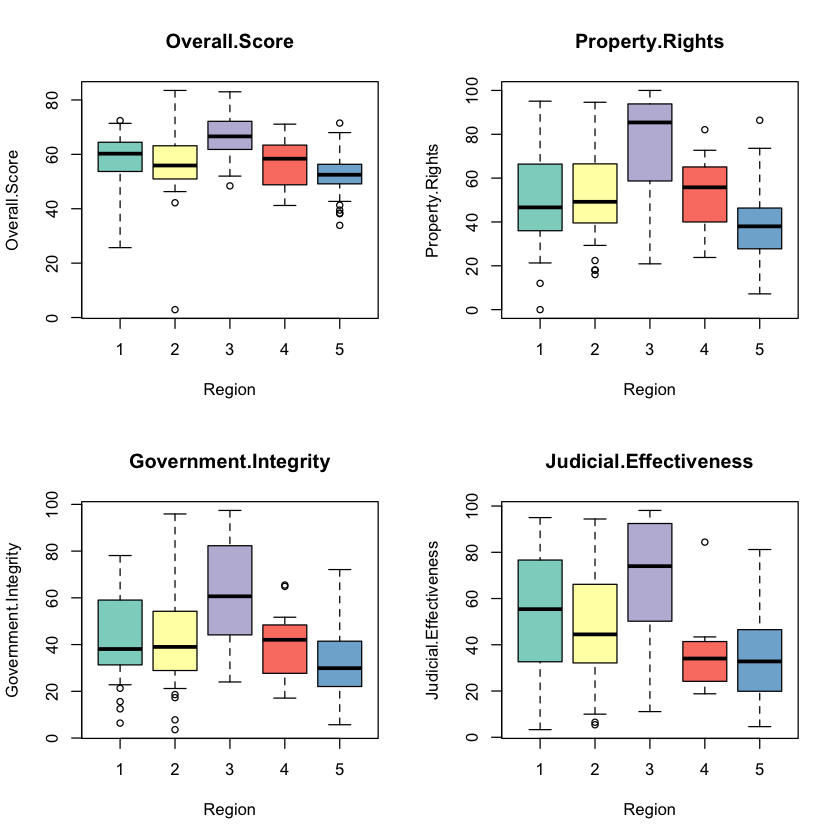

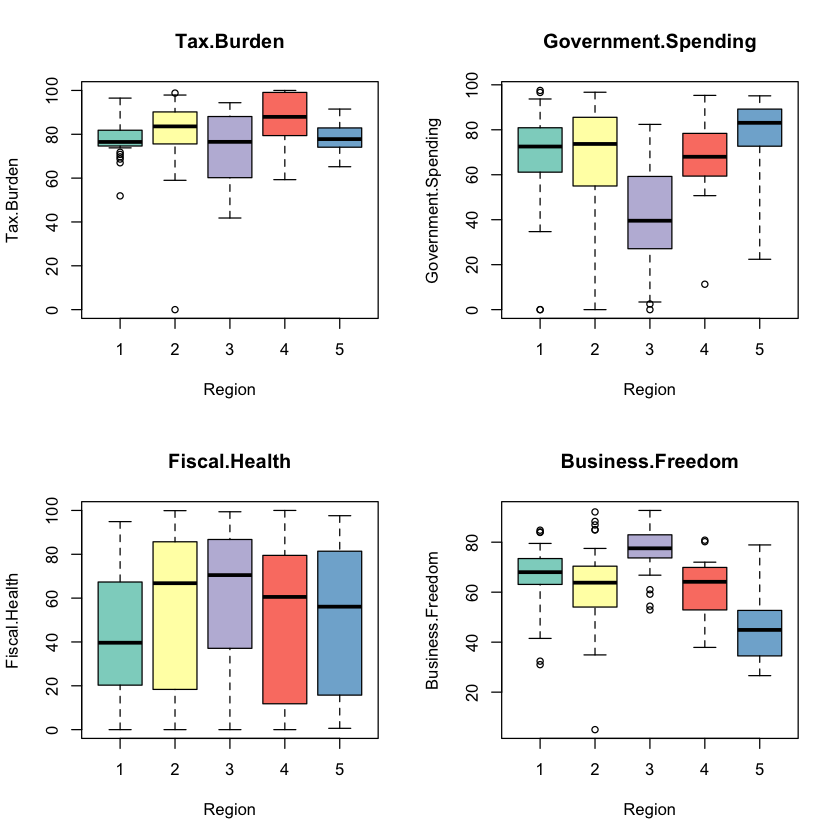

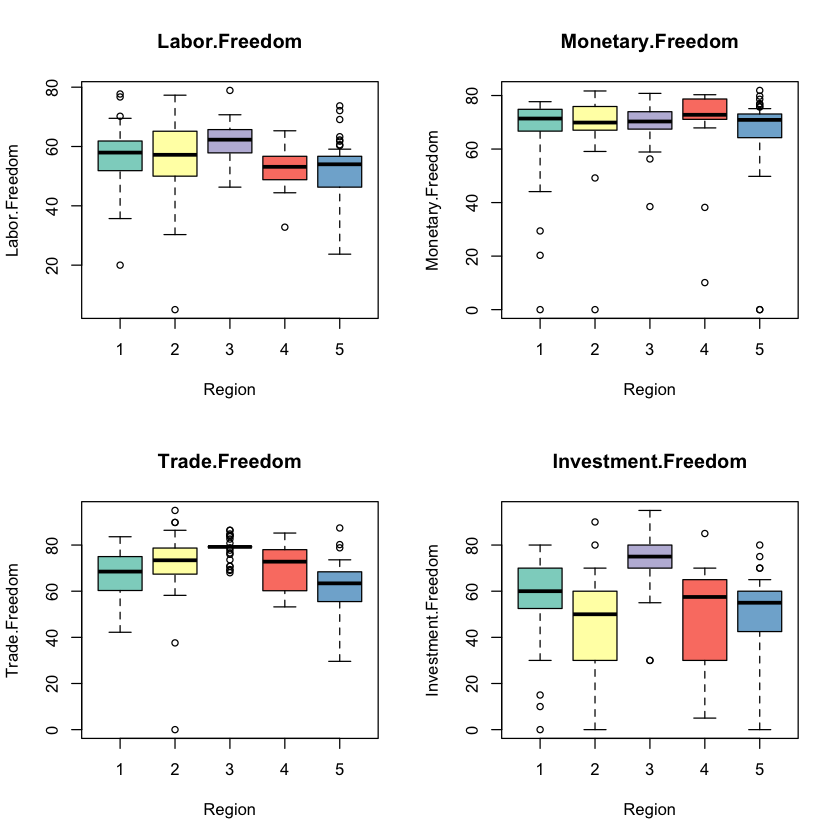

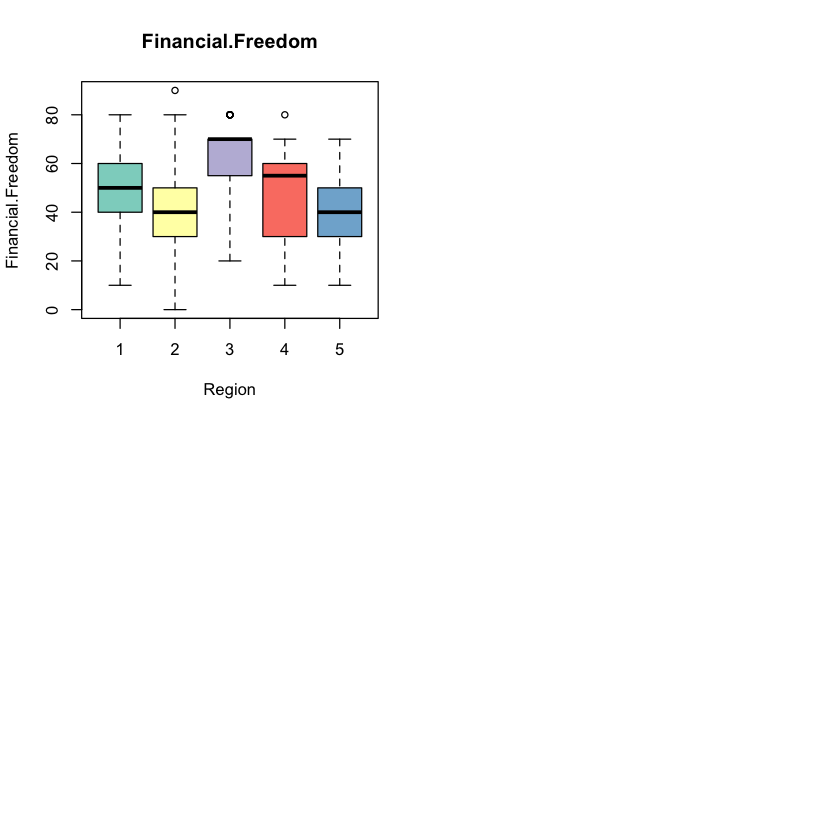

In [9]:
# continuous variables according to different levels of the categorical variable Region
par(mfrow = c(2, 2))
for (var in colnames(data)[5:17]){
    adjbox(data[[var]] ~ data$Region, main = var, xlab = 'Region', ylab = var, col = brewer.pal(12, "Set3"))
}

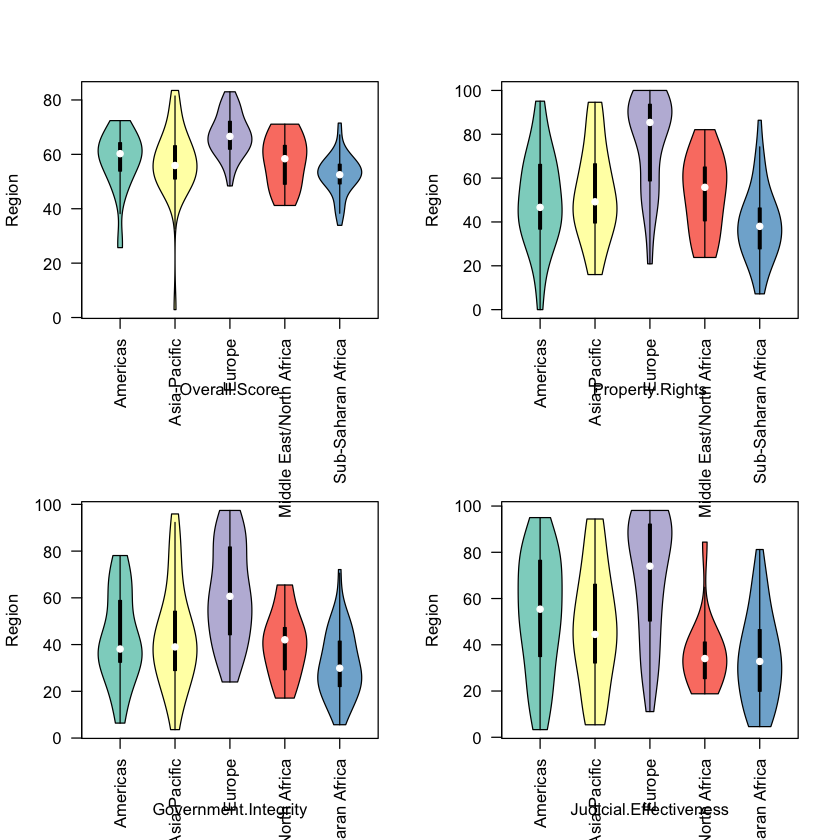

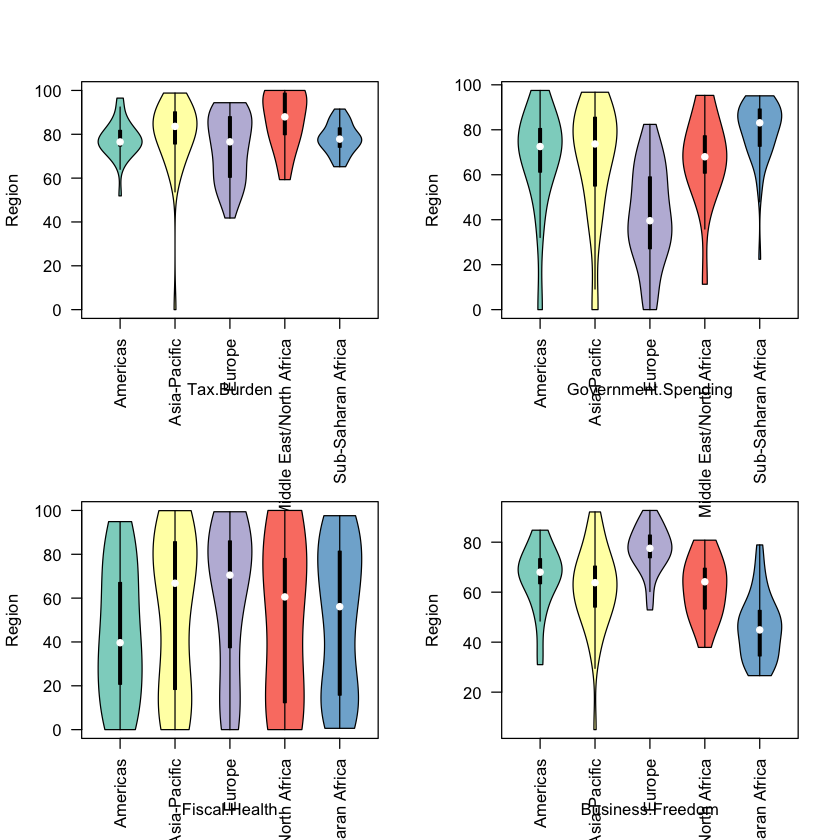

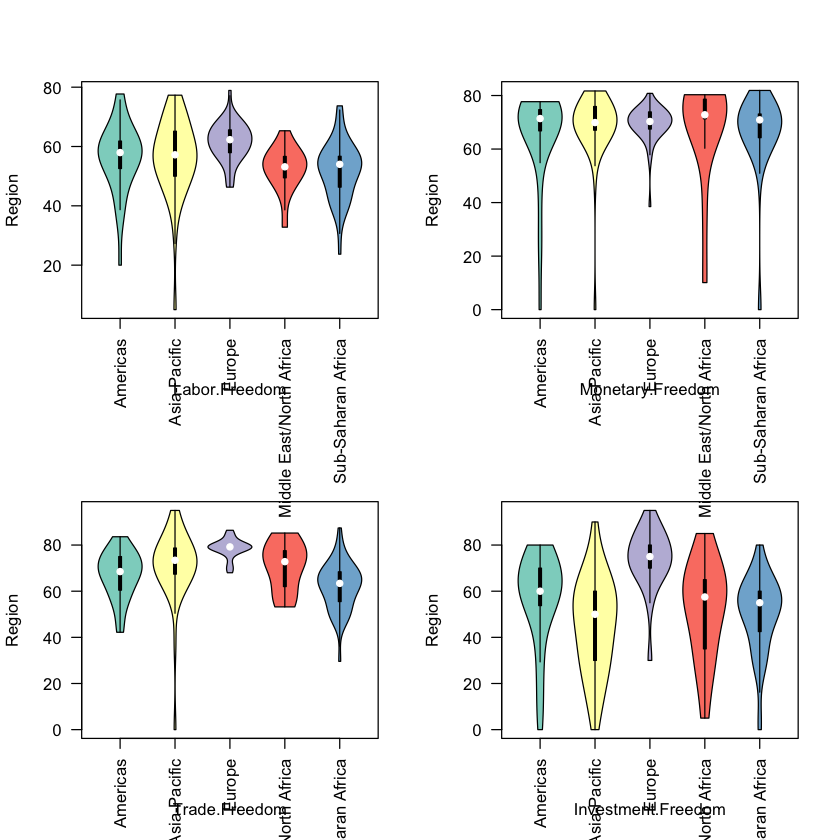

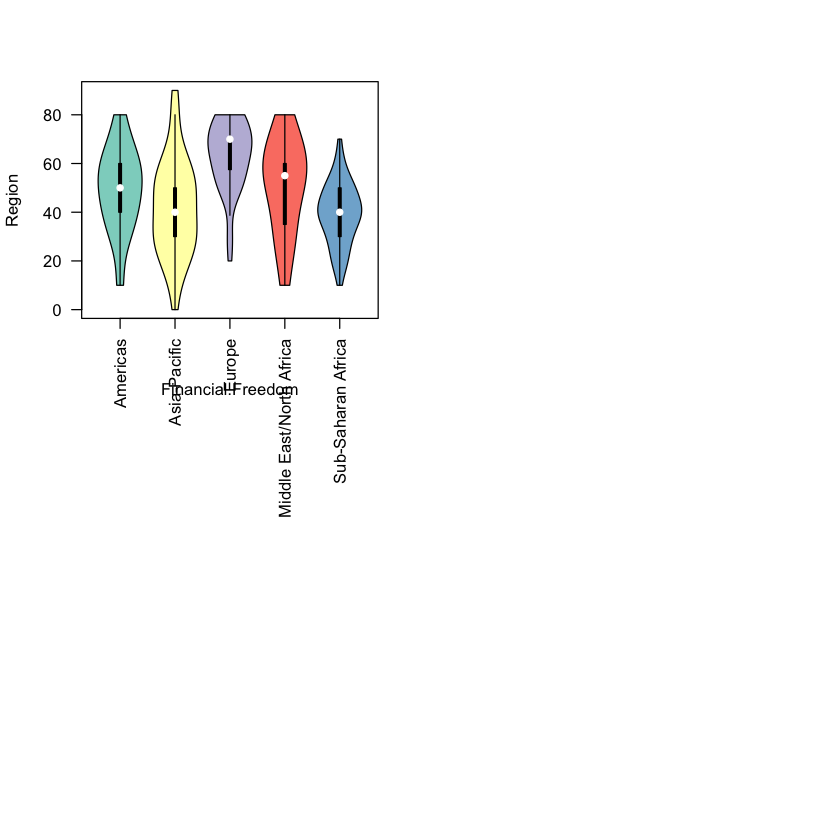

In [24]:
# violin plots
library(vioplot)
par(mfrow = c(2, 2))
for (var in colnames(data)[5:17]){
    vioplot(data[[var]] ~ Region, data = data, xlab = var, ylab = 'Region', col = brewer.pal(12, "Set3"), las = 2)
}

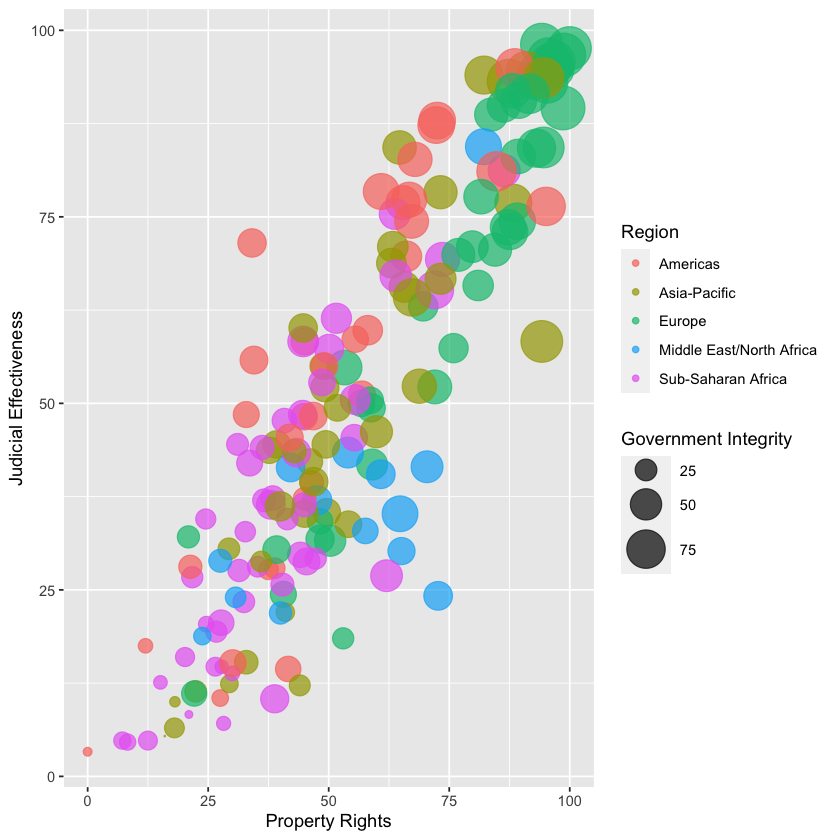

In [10]:
# bubble plot of rule of law (property rights, judicial effectiveness, government integrity)
library(ggplot2)
ggplot(data, aes(x=Property.Rights, y=Judicial.Effectiveness, size = Government.Integrity, color = Region)) +
    geom_point(alpha=0.7) +
    scale_size(range = c(.1, 12), name = 'Government Integrity') +
    ylab("Judicial Effectiveness") +
    xlab("Property Rights")

The bubble plot regarding rule of law suggests that property rights, judicial effectiveness and government integrity are correlated. In other words, countries where property rights fully function, judicial effectiveness and government integrity are also likely to be properly enforced.

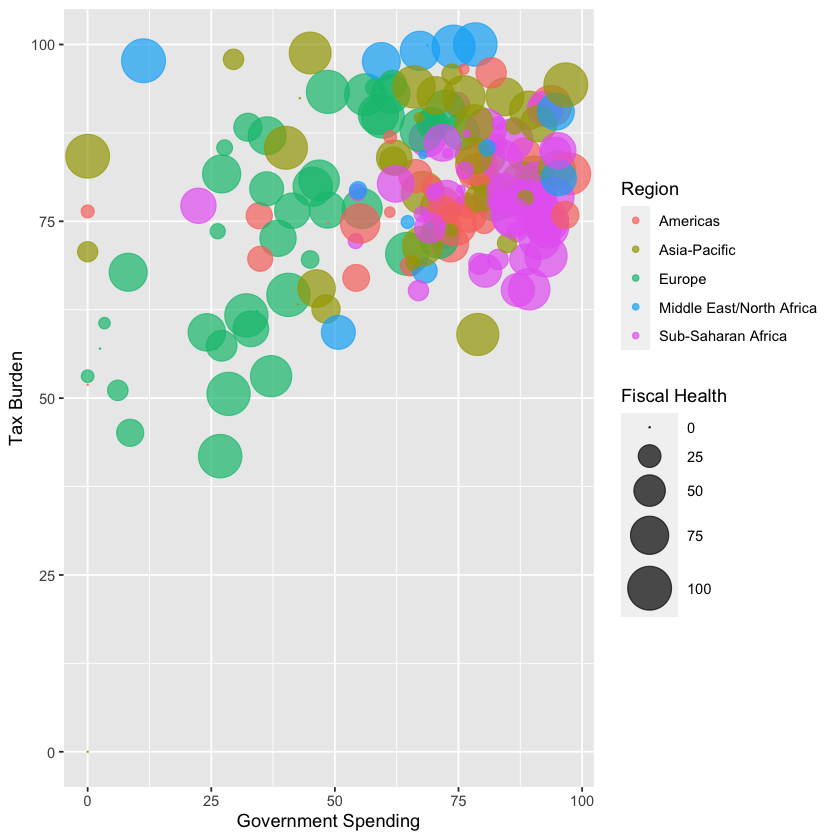

In [11]:
# bubble plot of government size (tax burden, government spending, fiscal health)
ggplot(data, aes(x = Government.Spending, y = Tax.Burden, size = Fiscal.Health, color = Region)) +
    geom_point(alpha = 0.7) +
    scale_size(range = c(.1, 12), name = 'Fiscal Health') +
    ylab('Tax Burden') +
    xlab('Government Spending')

All countries have quite a high tax burden score, however, although government spending score is varied, some countries, especially in Europe, have a moderate government spending. Furthermore, government spending and tax burden don't seem to be correlated to the fiscal health of the countries.

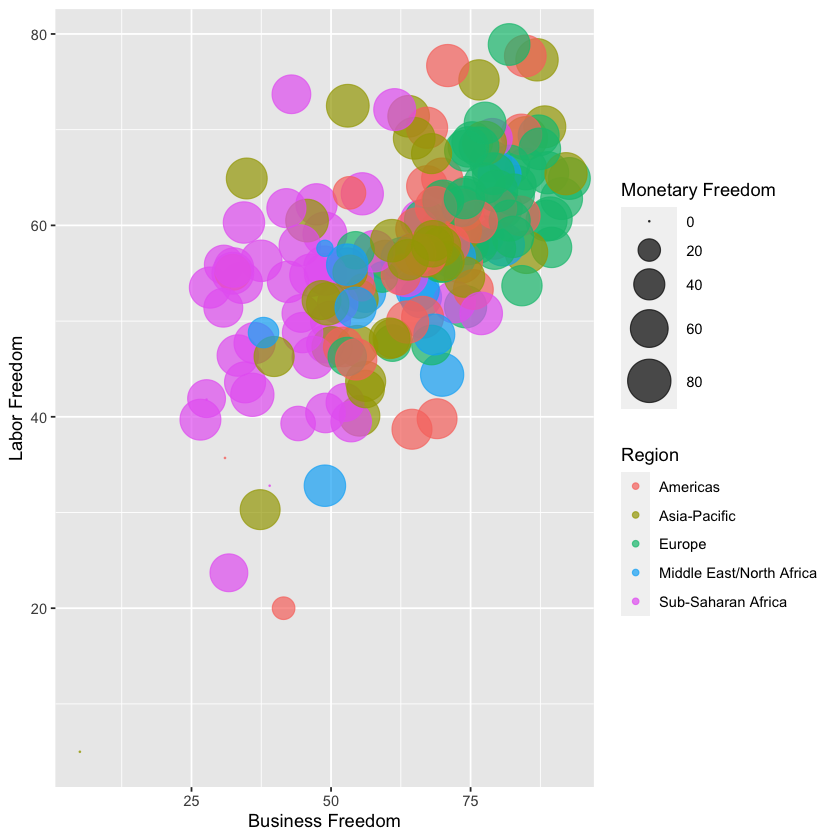

In [12]:
# bubble plot of regulatory efficiency (business freedom, labor freedom, monetary freedom)
ggplot(data, aes(x = Business.Freedom, y = Labor.Freedom, size = Monetary.Freedom, color = Region)) +
    geom_point(alpha = 0.7) +
    scale_size(range = c(.1, 12), name = 'Monetary Freedom') +
    ylab('Labor Freedom') +
    xlab('Business Freedom')

Business freedom and labor freedom tend to be slightly correlated, as can be observed on the bubble plot. However, monetary freedom doesn't exhibit correlation with the two above-mentioned variables.

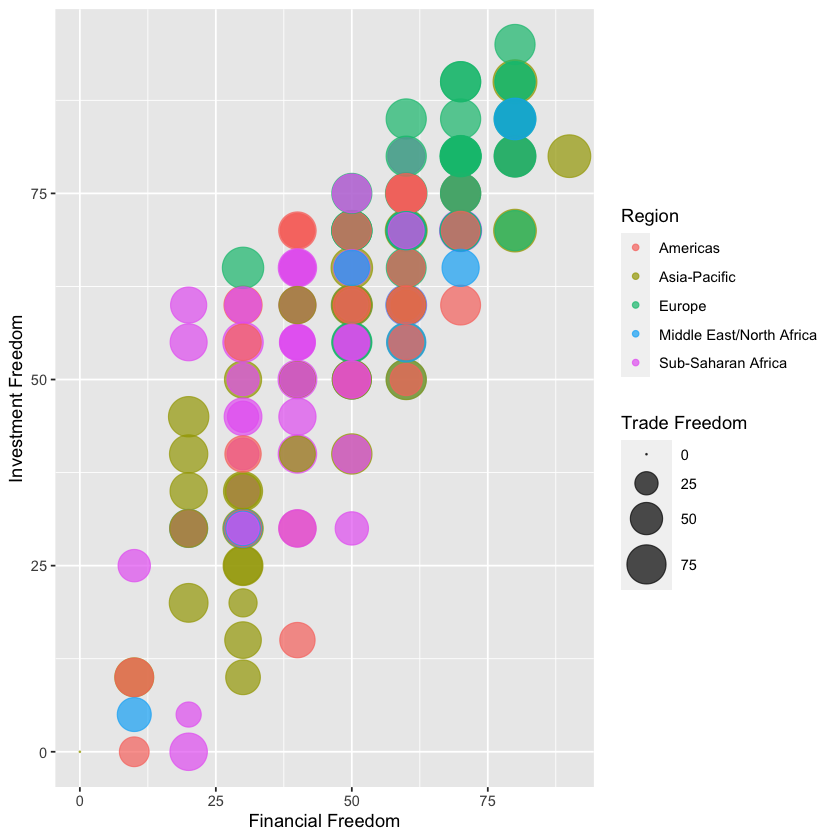

In [13]:
# bubble plot of market openness (trade freedom, investment freedom, financial freedom)
ggplot(data, aes(x = Financial.Freedom, y = Investment.Freedom, size = Trade.Freedom, color = Region)) +
    geom_point(alpha = 0.7) +
    scale_size(range = c(.1, 12), name = 'Trade Freedom') +
    ylab('Investment Freedom') +
    xlab('Financial Freedom')

Financial freedom and investment freedom seem to be positively correlated. On the other hand, trade freedom doesn't exhibit correlations with the other two variables.


Caricamento pacchetto: ‘psych’


I seguenti oggetti sono mascherati da ‘package:ggplot2’:

    %+%, alpha




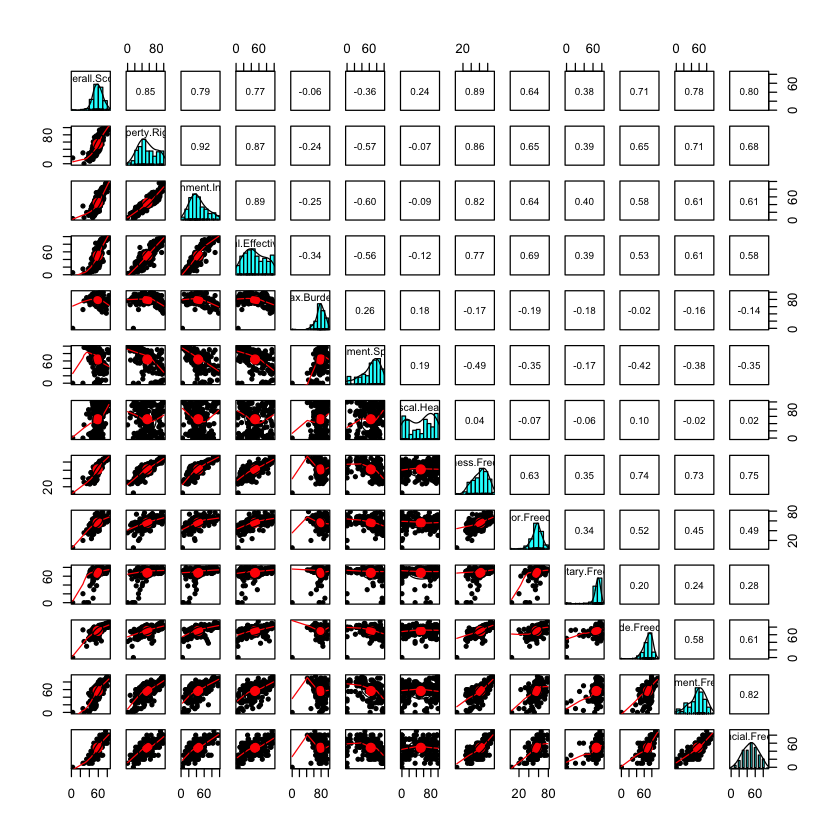

In [14]:
# pairwise plot
library(psych)
pairs.panels(data[c(5:17)], smooth = TRUE, density = TRUE, ellipses = TRUE, method = 'spearman', cor = TRUE, alpha = 0.01)    

corrplot 0.92 loaded



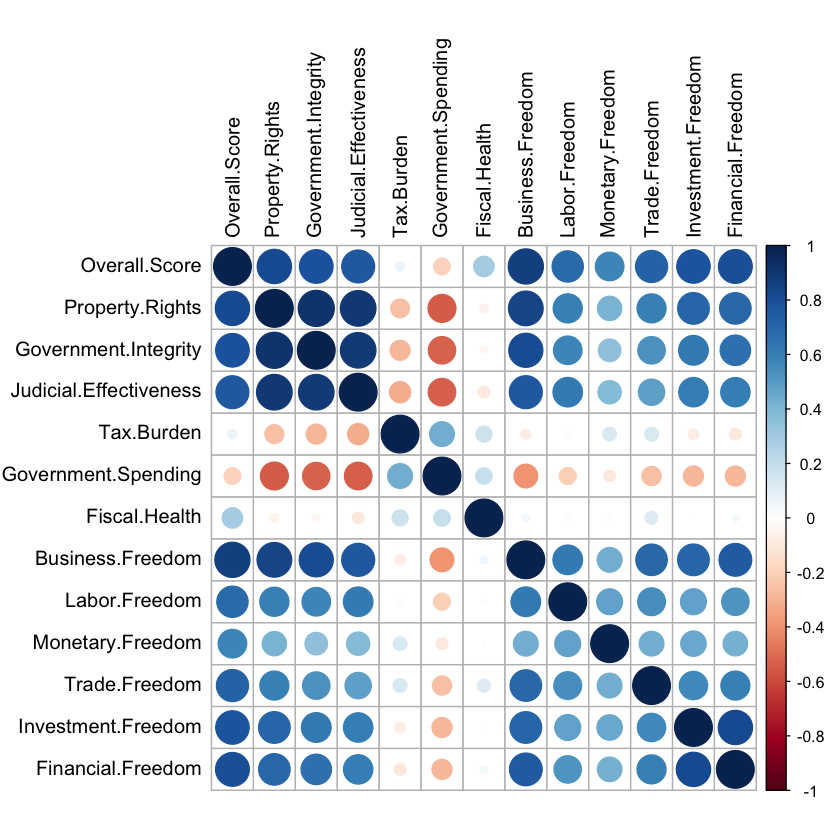

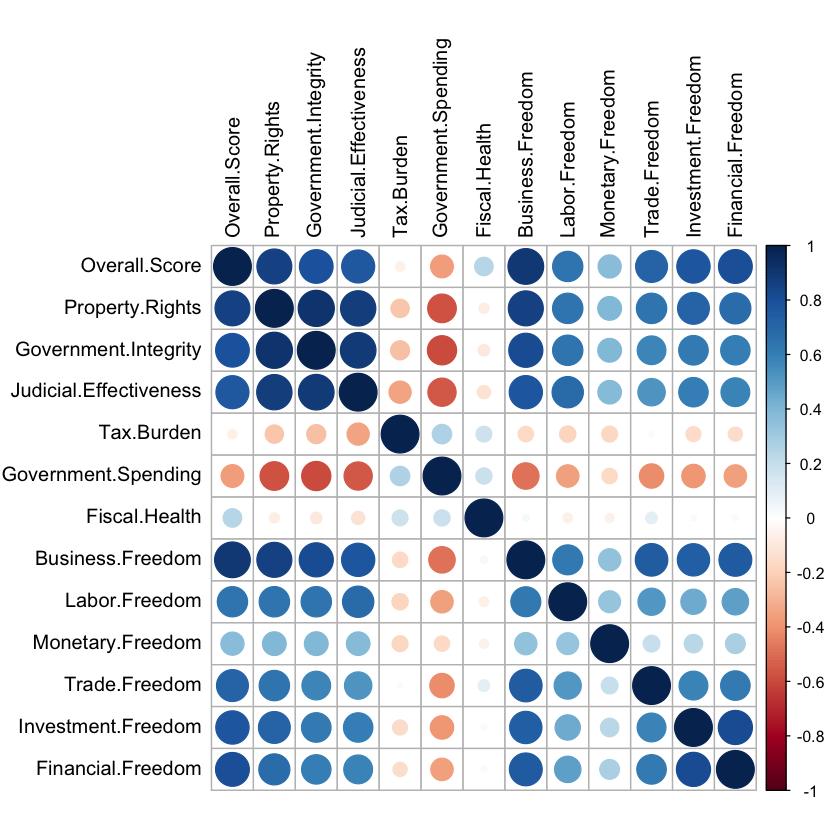

In [15]:
# correlation plot
library(corrplot)
par(mfrow = c(1,1))
corrplot(cor(data[c(5:17)], method = 'pearson'), tl.col = 'black')
corrplot(cor(data[c(5:17)], method = 'spearman'), tl.col = 'black')

Government integrity and property rights are strongly correlated (0.92), as previously shown by the bubble plot. Judicial effectiveness and government integrity are also strongly correlated (0.89). Property rights and judicial effectiveness are also strongly correlated (0.87), as are property rights and business freedom (0.86). Moreover, government integrity and business freedom are correlated (0.82), as are investment freedom and financial freedom (0.82).